# Generowanie danych historycznych

- symulowanie błędów wprowadzania danych poprzez mnożenie * [0.01, 0.1, 10, 100]
- fluktuacje ceny w ramach wzrostu liniowego

In [92]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import math

def errorify(value):
    error_factors = [0.01,0.1,10,100]
    error_value = value * rnd.choice(error_factors)
    return error_value

def error_price(price):
    return errorify(price)

def error_quantity(quantity):
    return errorify(quantity)

def gen_product(orders_no, price_init, price_end, order_qunat_rng, error_prob, bend):
    price_curr = price_init
    price_diff = (price_end - price_init)
    price_delta = price_diff/orders_no
    product_orders = []
    for i in range(orders_no):
        price = round(price_curr + (rnd.uniform(-0.1,0.1) * price_diff), 2)
        quantity = rnd.randrange(order_qunat_rng[0], order_qunat_rng[1])
        if rnd.random() < error_prob:
            if rnd.random() > 0.5:
                price = error_price(price)
            else:
                quantity = error_quantity(quantity)
        product_orders.append((price, quantity))
        price_curr += price_delta * rnd.uniform(i/orders_no, 0.5 + (i/orders_no))

    return product_orders

Przykładowe dane na podstawie treści zadania

[(97.61, 46), (101.66, 43), (96.89, 49), (99.87, 42), (98.82, 45), (97.1, 50), (103.55, 50), (102.98, 39), (97.9, 37), (102.8, 43), (100.3, 43), (97.85, 38), (98.85, 30), (104.68, 43), (103.9, 32), (103.44, 50), (99.33, 40), (102.46, 38), (104.33, 34), (99.95, 46), (105.86, 43), (99.67, 44), (105.89, 32), (102.72, 40), (104.02, 39), (100.49, 50), (107.69, 45), (101.23, 42), (102.36, 37), (105.32, 39), (106.27, 3.3000000000000003), (102.76, 50), (103.54, 43), (109.44, 33), (105.91, 31), (109.48, 4500), (108.41, 45), (104.88, 38), (109.62, 46), (106.37, 5.0), (110.21, 43), (112.17, 47), (111.2, 34), (111.29, 40), (107.91, 44), (112.33, 30), (110.38, 33), (110.28, 4.1000000000000005), (1108.9, 48), (116.06, 36), (113.29, 45), (110.96, 47), (115.46, 48), (117.14, 49), (115.45, 420), (113.05, 50), (112.25, 41), (118.87, 38), (117.22, 49), (120.56, 34)]


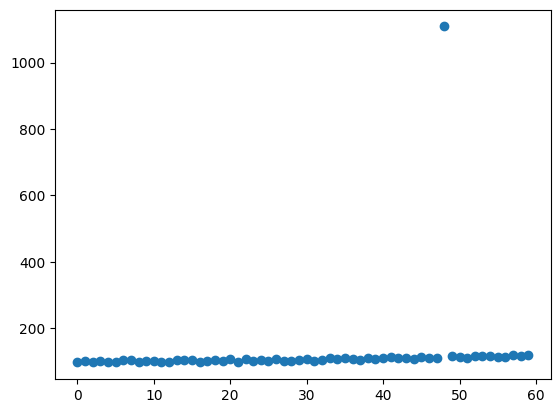

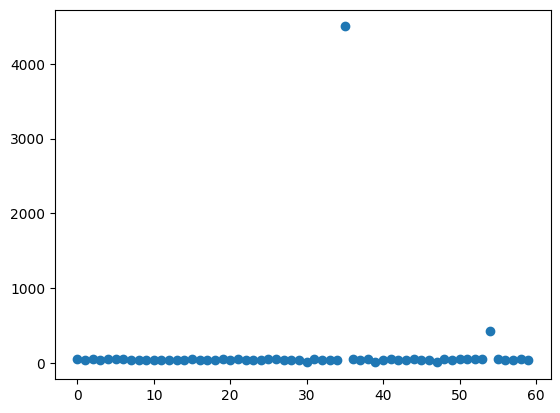

<Figure size 640x480 with 0 Axes>

In [93]:
product_sales = gen_product(60, 100, 124, (30,51), 0.2, 1)
print(product_sales)
x = [x for x in range(60)]
y_price = [x[0] for x in product_sales]
y_quantity = [x[1] for x in product_sales]
plt.scatter(x, y_price)
plt.show()
plt.clf()
plt.scatter(x, y_quantity)
plt.show()
plt.clf()

## Zastosowanie regresji liniowej do przybliżenia zależności

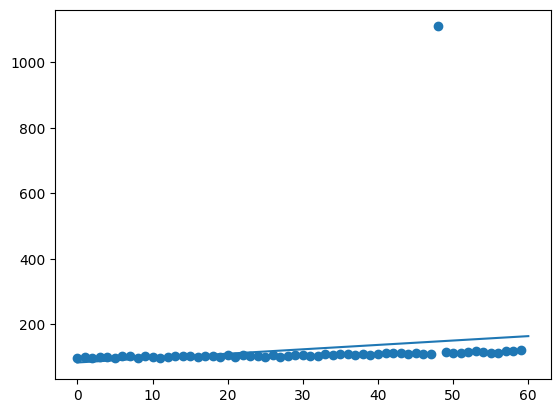

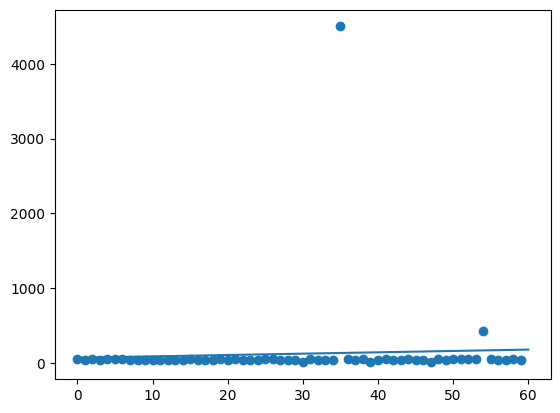

<Figure size 640x480 with 0 Axes>

In [94]:
def get_coeffs(x, y):
    x_np = np.array(x). reshape((-1,1))
    y_price = np.array(y)
    model_price = LinearRegression().fit(x_np, y_price)

    return (model_price.coef_[0], model_price.intercept_)

def print_with_approx(x, y, coeffs):
    n = len(x)
    plt.scatter(x, y)
    plt.plot([0,n], [coeffs[1], n * coeffs[0] + coeffs[1]])
    plt.show()
    plt.clf()

coeffs_p = get_coeffs(x, y_price)
coeffs_q = get_coeffs(x, y_quantity)
print_with_approx(x, y_price, coeffs_p)
print_with_approx(x, y_quantity, coeffs_q)

## Usuwanie odległych punktów w celu oczyszczenia danych

- zastosowanie regresji liniowej do przybliżenia zależności
- obliczenie odchylenia standardowego rezyduów (odległości wartości punktu od wartości przewidywanej)
- odrzucenie punktów o błędzie większym niż dwa odchylenia standardowe

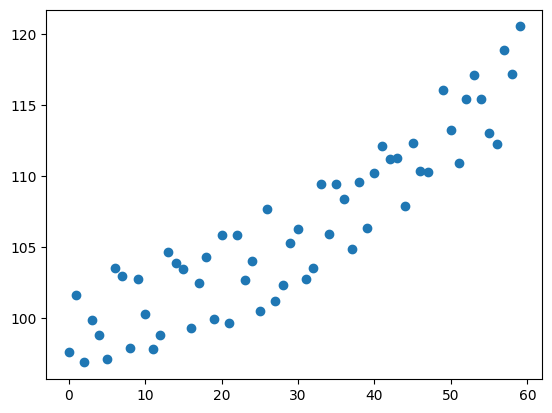

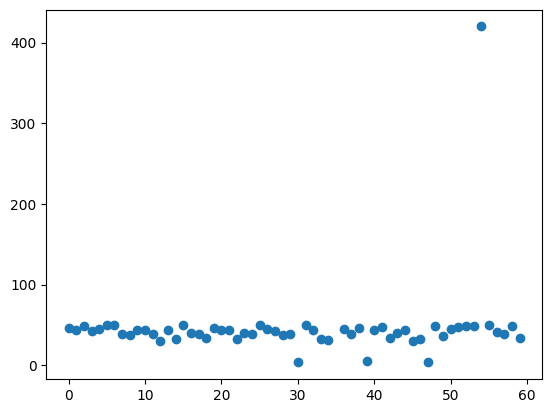

<Figure size 640x480 with 0 Axes>

In [95]:
def remove_outliers(x, y, coeffs):
    n = len(x)
    if n <= 2:
        return (x, y, 0)
    y_exp = [(x * coeffs[0] + coeffs[1]) for x in x]

    SSE = 0

    for i in range(n):
        SSE += (y[i] - y_exp[i])**2

    s = math.sqrt(SSE/(n-2))
    x_good = []
    y_good = []
    outlier_count = 0

    for i in range(n):
        if abs(y[i] - y_exp[i]) < abs(2 * s):
            x_good.append(i)
            y_good.append(y[i])
        else:
            outlier_count += 1

    return (x_good, y_good, outlier_count)

x_price, y_price, outlier_count_p = remove_outliers(x, y_price, coeffs_p)
x_quantity, y_quantity, outlier_count_q = remove_outliers(x, y_quantity, coeffs_q)

plt.scatter(x_price, y_price)
plt.show()
plt.clf()
plt.scatter(x_quantity, y_quantity)
plt.show()
plt.clf()

### Repetycja regresji liniowej póki istnieją punkty dużej dźwigni

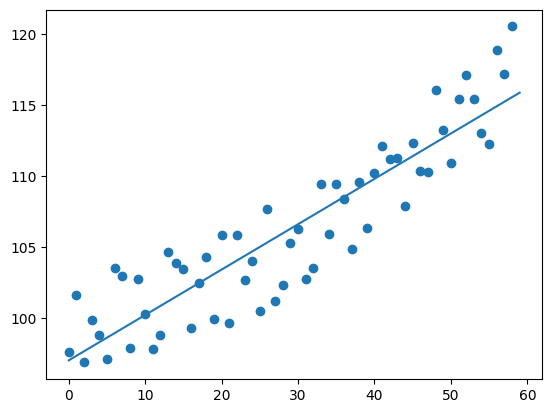

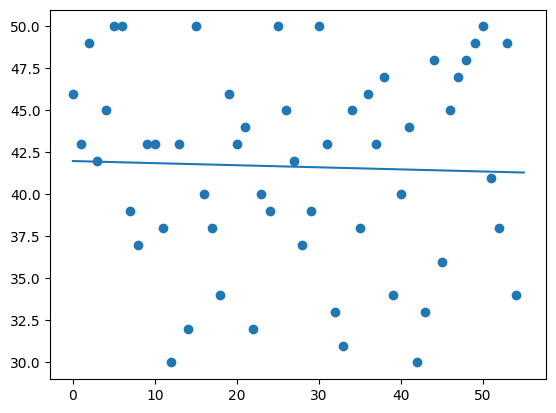

<Figure size 640x480 with 0 Axes>

In [96]:
coeffs_p = get_coeffs(x_price, y_price)
while outlier_count_p > 0:
    x_price, y_price, outlier_count_p = remove_outliers(x_price, y_price, coeffs_p)
    coeffs_p = get_coeffs(x_price, y_price)

coeffs_q = get_coeffs(x_quantity, y_quantity)
while outlier_count_q > 0:
    x_quantity, y_quantity, outlier_count_q = remove_outliers(x_quantity, y_quantity, coeffs_q)
    coeffs_q = get_coeffs(x_quantity, y_quantity)

print_with_approx(x_price, y_price, coeffs_p)
print_with_approx(x_quantity, y_quantity, coeffs_q)

# Implementacja ograniczeń na podstawie nierówności probabilistycznych

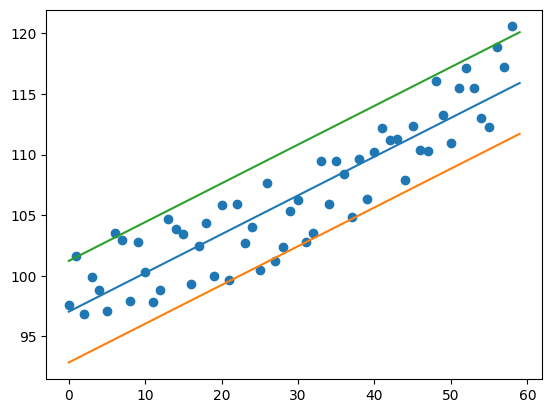

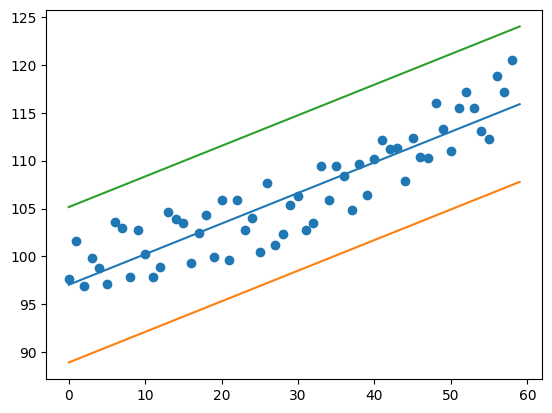

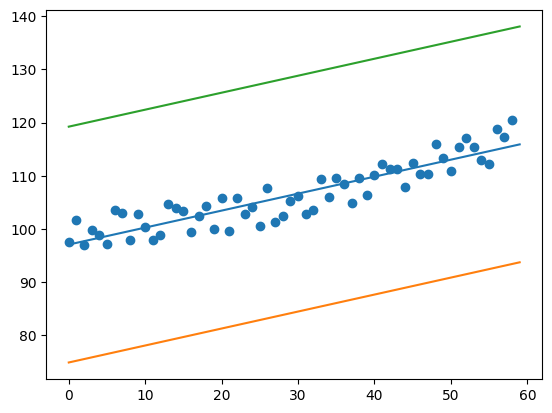

<Figure size 640x480 with 0 Axes>

In [97]:
def get_diffs(x,y,coeffs):
    n = len(x)
    y_exp = [(x * coeffs[0] + coeffs[1]) for x in x]
    return [y[i] - y_exp[i] for i in range(n)]

def get_threshold(diffs, alpha):
    n = len(diffs)
    diffs_abs = [abs(x) for x in diffs]
    diffs_abs.sort()
    return diffs_abs[math.floor(n * alpha)]

def get_threshold_markov(diffs, alpha):
    n = len(diffs)
    diffs_abs = [abs(x) for x in diffs]
    EX = sum(diffs_abs)/(n-1)
    return EX/(1-alpha)

def get_threshold_chebyshev(diffs, alpha):
    n = len(diffs)
    VarX = sum([x**2 for x in diffs])/n
    return math.sqrt(VarX/(1-alpha))

def print_with_threshold(x, y, coeffs, threshold):
    n = len(x)
    plt.scatter(x, y)
    plt.plot([0,n], [coeffs[1], n * coeffs[0] + coeffs[1]])
    plt.plot([0,n], [coeffs[1] - threshold, n * coeffs[0] + coeffs[1] - threshold])
    plt.plot([0,n], [coeffs[1] + threshold, n * coeffs[0] + coeffs[1] + threshold])
    plt.show()
    plt.clf()

diffs = get_diffs(x_price, y_price, coeffs_p)

print_with_threshold(x_price, y_price, coeffs_p, get_threshold(diffs, 0.9))
print_with_threshold(x_price, y_price, coeffs_p, get_threshold_chebyshev(diffs, 0.9))
print_with_threshold(x_price, y_price, coeffs_p, get_threshold_markov(diffs, 0.9))


### Sprawdzanie wiarygodności wprowadzanych danych

- obliczamy błąd nowego punktu względem prostej aproksymacyjnej
- sprawdzamy w które kryteria wpada

In [99]:
def check_plausability(x, y, coeffs, threshold):
    y_exp = (x * coeffs[0] + coeffs[1])
    if abs(y - y_exp) > threshold:
        return False
    return True

def print_all_checks(x, y, x_new, y_new, coeffs, alpha):
    diffs = get_diffs(x, y, coeffs)
    markov = check_plausability(x_new, y_new, coeffs, get_threshold_markov(diffs, alpha))
    chebyshev = check_plausability(x_new, y_new, coeffs, get_threshold_chebyshev(diffs, alpha))
    direct = check_plausability(x_new, y_new, coeffs, get_threshold(diffs, alpha))
    print("Markov: " + str(markov))
    print("Chebyshev: " + str(chebyshev))
    print("Direct: " + str(direct))

for alpha in [0.85,0.9,0.95,0.99]:
    print(alpha)
    print_all_checks(x_price, y_price, x_price[-1] + 1, 111, coeffs_p, alpha)

0.85
Markov: True
Chebyshev: True
Direct: False
0.9
Markov: True
Chebyshev: True
Direct: False
0.95
Markov: True
Chebyshev: True
Direct: False
0.99
Markov: True
Chebyshev: True
Direct: True


### Moduł testujący

- sprawdzamy odpowiedzi dla wartości kolejnego punktu odchylone o wielokrotności odchyleń standardowych

In [113]:
def check_plausability_all(x, y, x_new, y_new, coeffs):
    diffs = get_diffs(x, y, coeffs)
    markov = check_plausability(x_new, y_new, coeffs, get_threshold_markov(diffs, 0.85))
    chebyshev = check_plausability(x_new, y_new, coeffs, get_threshold_chebyshev(diffs, 0.95))
    direct = check_plausability(x_new, y_new, coeffs, get_threshold(diffs, 0.99))

    if sum([markov, chebyshev, direct]) > 1:
        return True
    return False

def test_plausability(x, y, y_given, coeffs):
    n = len(x)
    diffs = get_diffs(x, y, coeffs)
    s = math.sqrt(sum([x**2 for x in diffs])/(n-2))
    for a in [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]:
        print("a = " + str(a))
        print(check_plausability_all(x, y, x[-1] + 1, y_given + (a * s), coeffs))
        print(check_plausability_all(x, y, x[-1] + 1, y_given - (a * s), coeffs))

test_plausability(x_price, y_price, 125, coeffs_p)
test_plausability(x_quantity, y_quantity, 60, coeffs_q)

a = 0.0
True
True
a = 0.5
True
True
a = 1.0
False
True
a = 1.5
False
True
a = 2.0
False
True
a = 2.5
False
True
a = 3.0
False
True
a = 0.0
True
True
a = 0.5
True
True
a = 1.0
True
True
a = 1.5
True
True
a = 2.0
True
True
a = 2.5
True
True
a = 3.0
False
True
